In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tweepy
import json
from tweepy import OAuthHandler

#start by storing our keys and tokens in variables 
consumer_key = 'wawhmfZFEZHsHERkPfzkL0yCj'
consumer_secret = 'l0Ijb15DNizIQvrFMtsHdcw9GeOJlTqFmBNkno3r2c8Si8jisz'
access_token =  '1291343875630661637-Q7fTamZLa4ZhxyV1VoptHFTiI5v97T'
access_secret = 'VZj1LbVcwDkH75SDeKleYdYzDAtonb4AHBERoJWQMyPzh'

#authenticate using our credentials as follows:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)


#search in twitter
#for tweet in api.search('somizi'):
    #print(tweet.text)

#post on twitter
#api.update_status ("Look i'm tweeting from #python coding is the future people but it ain't fun!!!")

#list of followers/followed friends
#for friend in tweepy.Cursor(api.friends).items(2):
  #print(json.dumps(friend._json))

#we can read our own timeline (i.e. our Twitter homepage) 
#for status in tweepy.Cursor(api.home_timeline).items(20):
# Process a single status
   # print(status.text)

   
    
df = pd.DataFrame(columns = ['Tweets', 'User', 'User_statuses_count',  'User_location','rt_count', 'tweet_date'])

def stream(data, file_name):
    i = 0
    for tweet in tweepy.Cursor(api.search, q=data, count=100, lang='en').items():
        print(i, end='\r')
        df.loc[i, 'Tweets'] = tweet.text
        df.loc[i, 'User'] = tweet.user.name
        df.loc[i, 'User_statuses_count'] = tweet.user.statuses_count
        df.loc[i, 'User_location'] = tweet.user.location
        df.loc[i, 'rt_count'] = tweet.retweet_count
        df.loc[i, 'tweet_date'] = tweet.created_at
        df.to_csv('{}.csv'.format(file_name))
        i+=1
        if i == 80:
            break
        else:
            pass
stream(data = ['covid-19'], file_name = 'tweets')
df.head()




Tweets            User  \
0  RT @rmayemsinger: Donald has now officially do...  most likely JM   
1  RT @JoeBiden: Here’s how COVID-19 affected Ari...    Rabid Badger   
2  RT @ElijahSchaffer: Median age of Covid-19 dea...      Brewski 🇺🇸   
3  RT @patgagnon_75: Remember that time Conservat...   anima_anonyma   
4  Vaccines as Global Public Good - Coronavirus O...  Rosetta Ceesay   

  User_statuses_count              User_location rt_count           tweet_date  
0                4560                                6234  2020-08-07 12:51:45  
1                2246                                1305  2020-08-07 12:51:45  
2                4636                                 890  2020-08-07 12:51:45  
3                3537                                  68  2020-08-07 12:51:45  
4               26079  Batti Village The Gambia         0  2020-08-07 12:51:45

Text(0, 0.5, 'No. of Retweets')

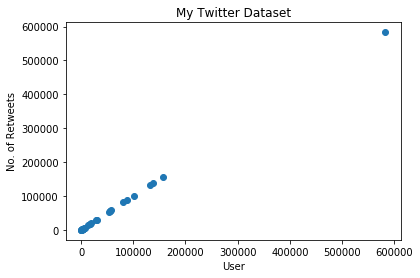

In [77]:
import pandas 
tweets = pd.read_csv("tweets.csv")

# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(tweets['User_statuses_count'], tweets['User_statuses_count'])
# set a title and labels
ax.set_title('My Twitter Dataset')
ax.set_xlabel('No. of Posted Statuses')
ax.set_ylabel('No. of Retweets')

KeyError: '2020-08-07 12:32:29'

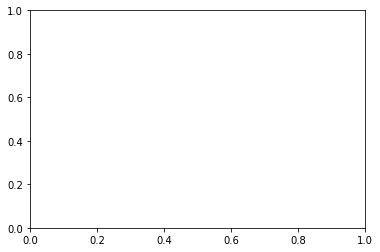

In [81]:
# create color dictionary
colors = {'2020-08-07 12:51:45':'y', '2020-08-07 12:51:44':'r', '2020-08-07 12:51:43':'g', '2020-08-07 12:51:42':'b'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(tweets['rt_count'])):
    ax.scatter(tweets['rt_count'][i], tweets['User_statuses_count'][i],color=colors[tweets['tweet_date'][i]])
# set a title and labels
ax.set_title('My Twitter Dataset')
ax.set_xlabel('rt_count')
ax.set_ylabel('User_statuses_count')